In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\Python learning\DATA SCIENCE & ML\Class 10(Performance metrix)\heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('DEATH_EVENT',axis = 1),df[['DEATH_EVENT']],test_size=.30,random_state= 1)

In [8]:
xtrain.shape

(209, 12)

In [9]:
ytrain.shape

(209, 1)

In [10]:
ytest.shape

(90, 1)

In [11]:
xtest.shape

(90, 12)

# Training with Knn classifier model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knnc = KNeighborsClassifier()

In [14]:
knnc.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [15]:
knnc.score(xtest,ytest)

0.6111111111111112

In [16]:
pred = knnc.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [17]:
ytest['Predicted'] = pred

In [18]:
ytest.head()

,DEATH_EVENT,Predicted
173,0,0
287,0,0
51,1,0
146,0,0
214,0,0


In [19]:
#testing accuracy
knnc.score(xtest,ytest['DEATH_EVENT'])

0.6111111111111112

In [20]:
pred2 = knnc.predict(xtrain)

In [21]:
ytrain['Predicted'] = pred2
ytrain.head()

,DEATH_EVENT,Predicted
14,0,0
210,0,1
236,0,0
44,1,1
163,1,1


In [22]:
#training accuracy
knnc.score(xtrain,ytrain['DEATH_EVENT'])

0.7464114832535885

# Performance metrices

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_roc_curve

In [24]:
print(classification_report(ytest['DEATH_EVENT'],pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        64
           1       0.15      0.08      0.10        26

    accuracy                           0.61        90
   macro avg       0.42      0.45      0.43        90
weighted avg       0.53      0.61      0.56        90



In [25]:
cm = confusion_matrix(ytest['DEATH_EVENT'],ytest['Predicted'])

In [26]:
cm

array([[53, 11],
       [24,  2]], dtype=int64)

<AxesSubplot:>

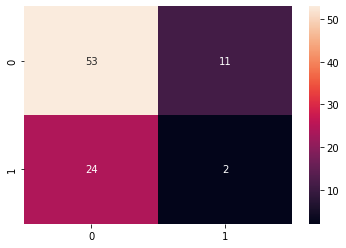

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
tp,fp,fn,tn=confusion_matrix(ytest['DEATH_EVENT'],ytest['Predicted']).reshape(-1)

In [29]:
tp

53

In [30]:
fp

11

In [31]:
fn

24

In [32]:
tn

2

In [33]:
acc = (tp+tn)/(tp+fp+fn+tn)
acc

0.6111111111111112

In [34]:
knnc.score(xtest,ytest[['DEATH_EVENT']])

0.6111111111111112

In [35]:
accuracy_score(ytest['DEATH_EVENT'],ytest['Predicted'])

0.6111111111111112

In [36]:
#Precision or Positive Predictive Value (PPV)
PPV= tp/(tp+fp)
PPV

0.828125

In [37]:
#Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
TPR= tp/(tp+fn)
TPR

0.6883116883116883

In [38]:
#False Positive Rate (FPR) or 1-Specificity
FPR= fp/(fp+tn)
FPR

0.8461538461538461

In [39]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = tn/(tn+fp)
Specificity

0.15384615384615385

In [40]:
#Threat Score (TS) or Critical Success Index (CSI)
TS = tp/(tp+fn+fp)
TS

0.6022727272727273

In [41]:
#False Discovery Rate (FDR)
FDR = fp/(tp+fp)
FDR

0.171875

In [42]:
#Harmonic Mean, F-Measure
fmeasure = (2*PPV*TPR)/(PPV+TPR)
fmeasure

0.7517730496453902

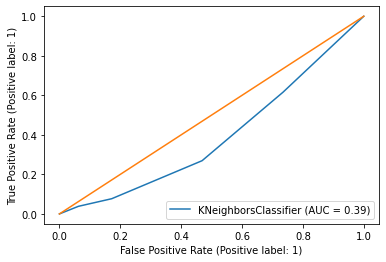

In [43]:
plot_roc_curve(knnc,xtest,ytest['DEATH_EVENT'])
plt.plot([0,1],[0,1])